# AlexNet in Keras

## Requirements

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%run "~/PycharmProjects/AlexNet-Keras/train.py"

image_width = 224
image_height = 224
image_size = (image_width, image_height)
batch_size = 10

## Load Data

In [8]:
df = generate_data()
df

,file,class
0,dog.1.jpg,1
1,dog.0.jpg,1
2,cat.5.jpg,0
3,dog.5.jpg,1
4,dog.4.jpg,1
5,cat.3.jpg,0
6,cat.4.jpg,0
7,dog.2.jpg,1
8,dog.3.jpg,1
9,cat.0.jpg,0


## Generate Model

In [9]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 384)         1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)         884992    
__________

## Show Sample Image

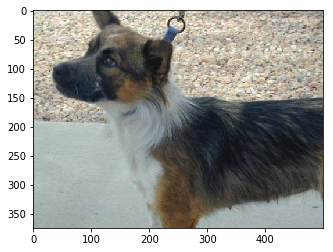

This is dog


In [10]:
index = np.random.randint(df.shape[0])
path = "data/" + df['file'].iloc[index]

data = plt.imread(path)
plt.imshow(data)
plt.show()

print("This is {}".format(df['file'].iloc[index].split('.')[0]))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


train_generator = data.flow_from_dataframe(
    df, 
    "data/", 
    x_col='file',
    y_col='class',
    target_size=image_size,
    class_mode='binary',
    batch_size=batch_size
)

Found 12 images belonging to 2 classes.


## Training

In [12]:
model.fit(train_generator, epochs=3)

Epoch 1/3
2/2 [==============================] - 2s 932ms/step - loss: 5.8455 - acc: 0.5000
Epoch 2/3
2/2 [==============================] - 2s 768ms/step - loss: 10.0968 - acc: 0.5000
Epoch 3/3
2/2 [==============================] - 2s 764ms/step - loss: 7.9712 - acc: 0.5000
